In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.gofplots import qqplot


In [8]:
# Input Data
data = pd.DataFrame({
    'Pressure': [415, 550]*8,
    'Temp': [25, 25, 95, 95]*4,
    'Moisture': [5, 5, 5, 5, 15, 15, 15, 15]*2,
    'FlowRate': [40]*8 + [60]*8,
    'ParticleSize': [1.28, 4.05, 4.05, 1.28, 4.05, 1.28, 1.28, 4.05, 4.05, 1.28, 1.28, 4.05, 1.28, 4.05, 4.05, 1.28],
    'Yield': [63, 21, 36, 99, 24, 66, 71, 54, 23, 74, 80, 33, 63, 21, 44, 96]
})


In [9]:
# Defining X and y
X = data[['Pressure', 'Temp', 'Moisture', 'FlowRate', 'ParticleSize']]
y = data['Yield']
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()


In [10]:
# Display model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     29.86
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.05e-05
Time:                        22:58:06   Log-Likelihood:                -52.344
No. Observations:                  16   AIC:                             116.7
Df Residuals:                      10   BIC:                             121.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.0790     18.887      2.757   

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


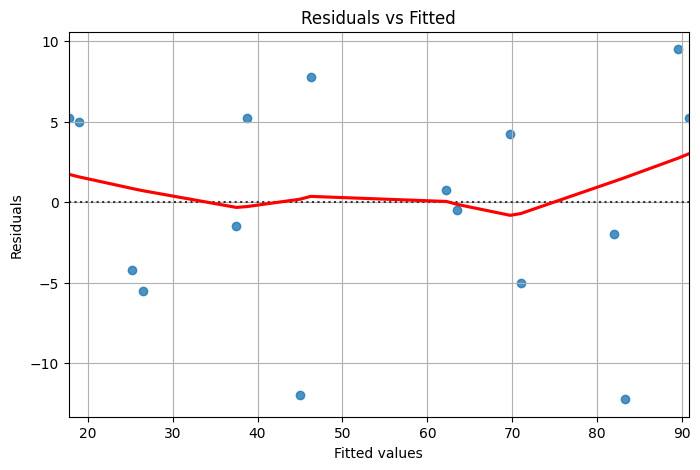

In [11]:
# Residuals and Fitted
residuals = model.resid
fitted = model.fittedvalues

# Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.grid()
plt.show()


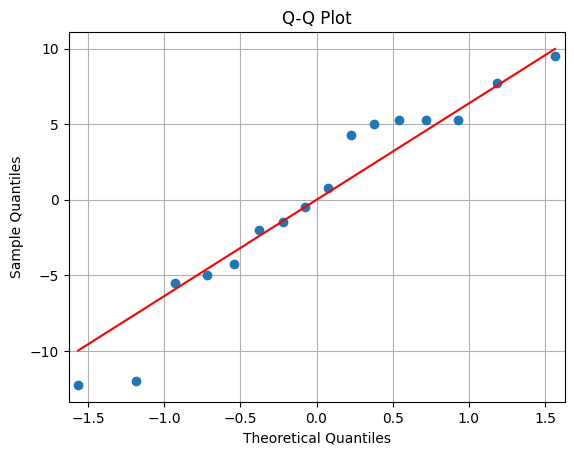

In [12]:
# Q-Q Plot
qqplot(residuals, line='s')
plt.title("Q-Q Plot")
plt.grid()
plt.show()


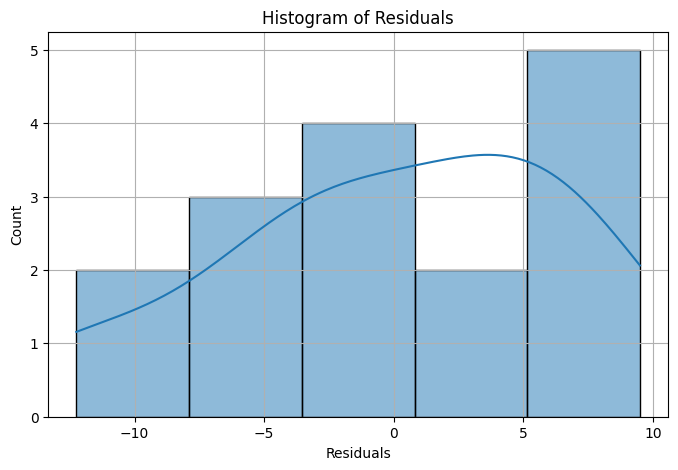

In [13]:
# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.grid()
plt.show()


In [14]:
# Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:\n", vif_data)


Variance Inflation Factors:
         feature        VIF
0         const  87.737296
1      Pressure   1.000000
2          Temp   1.000000
3      Moisture   1.000000
4      FlowRate   1.000000
5  ParticleSize   1.000000


In [15]:
# Heteroskedasticity Test
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan Test:")
print(f"LM Statistic: {bp_test[0]}, p-value: {bp_test[1]}")


Breusch-Pagan Test:
LM Statistic: 5.101264019856451, p-value: 0.4036473132380413


In [16]:
# Autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 1.7609531129900169
